In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data_01 = pd.read_csv(f'feature_engineered_dataset.csv')
data_v1 = data_01.copy()

In [10]:
data_v1.head()

,encoder__Undergraduate Major_Arts,encoder__Undergraduate Major_Business,encoder__Undergraduate Major_Economics,encoder__Undergraduate Major_Engineering,encoder__Undergraduate Major_Science,encoder__Current Job Title_Analyst,encoder__Current Job Title_Consultant,encoder__Current Job Title_Engineer,encoder__Current Job Title_Entrepreneur,encoder__Current Job Title_Manager,...,remainder__GRE/GMAT Score,remainder__Undergrad University Ranking,remainder__Entrepreneurial Interest,remainder__Networking Importance,remainder__Expected Post-MBA Salary,remainder__Gender,remainder__Has Management Experience,remainder__Location Preference (Post-MBA),remainder__Online vs. On-Campus MBA,remainder__Decided to Pursue MBA?
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.034780,-0.428223,0.936743,0.802780,0.636603,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.686449,1.090391,-0.648879,-0.549463,0.869308,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.597554,-0.966640,0.472659,-0.008565,-0.198866,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.065743,0.068778,-1.731744,-0.085837,-0.160710,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.331825,0.627904,1.555523,-0.240379,1.655018,0.0,0.0,0.0,1.0,1.0


In [12]:
data_v1.columns

Index(['encoder__Undergraduate Major_Arts',
       'encoder__Undergraduate Major_Business',
       'encoder__Undergraduate Major_Economics',
       'encoder__Undergraduate Major_Engineering',
       'encoder__Undergraduate Major_Science',
       'encoder__Current Job Title_Analyst',
       'encoder__Current Job Title_Consultant',
       'encoder__Current Job Title_Engineer',
       'encoder__Current Job Title_Entrepreneur',
       'encoder__Current Job Title_Manager',
       'encoder__MBA Funding Source_Employer',
       'encoder__MBA Funding Source_Loan',
       'encoder__MBA Funding Source_Scholarship',
       'encoder__MBA Funding Source_Self-funded',
       'encoder__Desired Post-MBA Role_Consultant',
       'encoder__Desired Post-MBA Role_Executive',
       'encoder__Desired Post-MBA Role_Finance Manager',
       'encoder__Desired Post-MBA Role_Marketing Director',
       'encoder__Desired Post-MBA Role_Startup Founder',
       'encoder__Reason for MBA_Career Growth',
       'enco

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel



# Separate features (X) and target (y)
# Replace 'target_column' with the name of your target column
X = data_v1.drop(columns=['remainder__Decided to Pursue MBA?'])
y = data_v1['remainder__Decided to Pursue MBA?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if not already scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply L1 Regularization (Lasso) for feature selection
# Adjust the alpha parameter to control the sparsity (higher alpha = fewer features)
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Use SelectFromModel to select features based on Lasso coefficients
selector = SelectFromModel(lasso, prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_feature_names)

# Save the selected features to a new dataset (optional)
selected_data = X[selected_feature_names]
selected_data['remainder__Decided to Pursue MBA?'] = y  # Add the target column back
selected_data.to_csv('selected_features_dataset.csv', index=False)

Selected Features:
Index(['encoder__Undergraduate Major_Business',
       'encoder__Current Job Title_Analyst',
       'encoder__Current Job Title_Consultant',
       'encoder__Reason for MBA_Career Growth'],
      dtype='object')


/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_6369/3690707656.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['remainder__Decided to Pursue MBA?'] = y  # Add the target column back


In [24]:
# Assuming X is your feature matrix and scaled_X_train_v1 is the scaled version of X
# Calculate variance of each feature
variances = X_train_scaled.var(axis=0)

# Set a variance threshold (adjust as needed)
variance_threshold = 0.02

# Identify features with variance above the threshold
selected_features = X.columns[variances >= variance_threshold]

# Print the selected features
print("Selected Features (Variance >= {}):".format(variance_threshold))
print(selected_features)

# Filter the dataset to keep only the selected features
X_selected = X[selected_features]


Selected Features (Variance >= 0.02):
Index(['encoder__Undergraduate Major_Arts',
       'encoder__Undergraduate Major_Business',
       'encoder__Undergraduate Major_Economics',
       'encoder__Undergraduate Major_Engineering',
       'encoder__Undergraduate Major_Science',
       'encoder__Current Job Title_Analyst',
       'encoder__Current Job Title_Consultant',
       'encoder__Current Job Title_Engineer',
       'encoder__Current Job Title_Entrepreneur',
       'encoder__Current Job Title_Manager',
       'encoder__MBA Funding Source_Employer',
       'encoder__MBA Funding Source_Loan',
       'encoder__MBA Funding Source_Scholarship',
       'encoder__MBA Funding Source_Self-funded',
       'encoder__Desired Post-MBA Role_Consultant',
       'encoder__Desired Post-MBA Role_Executive',
       'encoder__Desired Post-MBA Role_Finance Manager',
       'encoder__Desired Post-MBA Role_Marketing Director',
       'encoder__Desired Post-MBA Role_Startup Founder',
       'encoder__Reaso

Dataset information:
Shape: (10000, 37)
Columns: 37 features plus target variable
Target distribution: remainder__Decided to Pursue MBA?
1.0    0.5907
0.0    0.4093
Name: proportion, dtype: float64


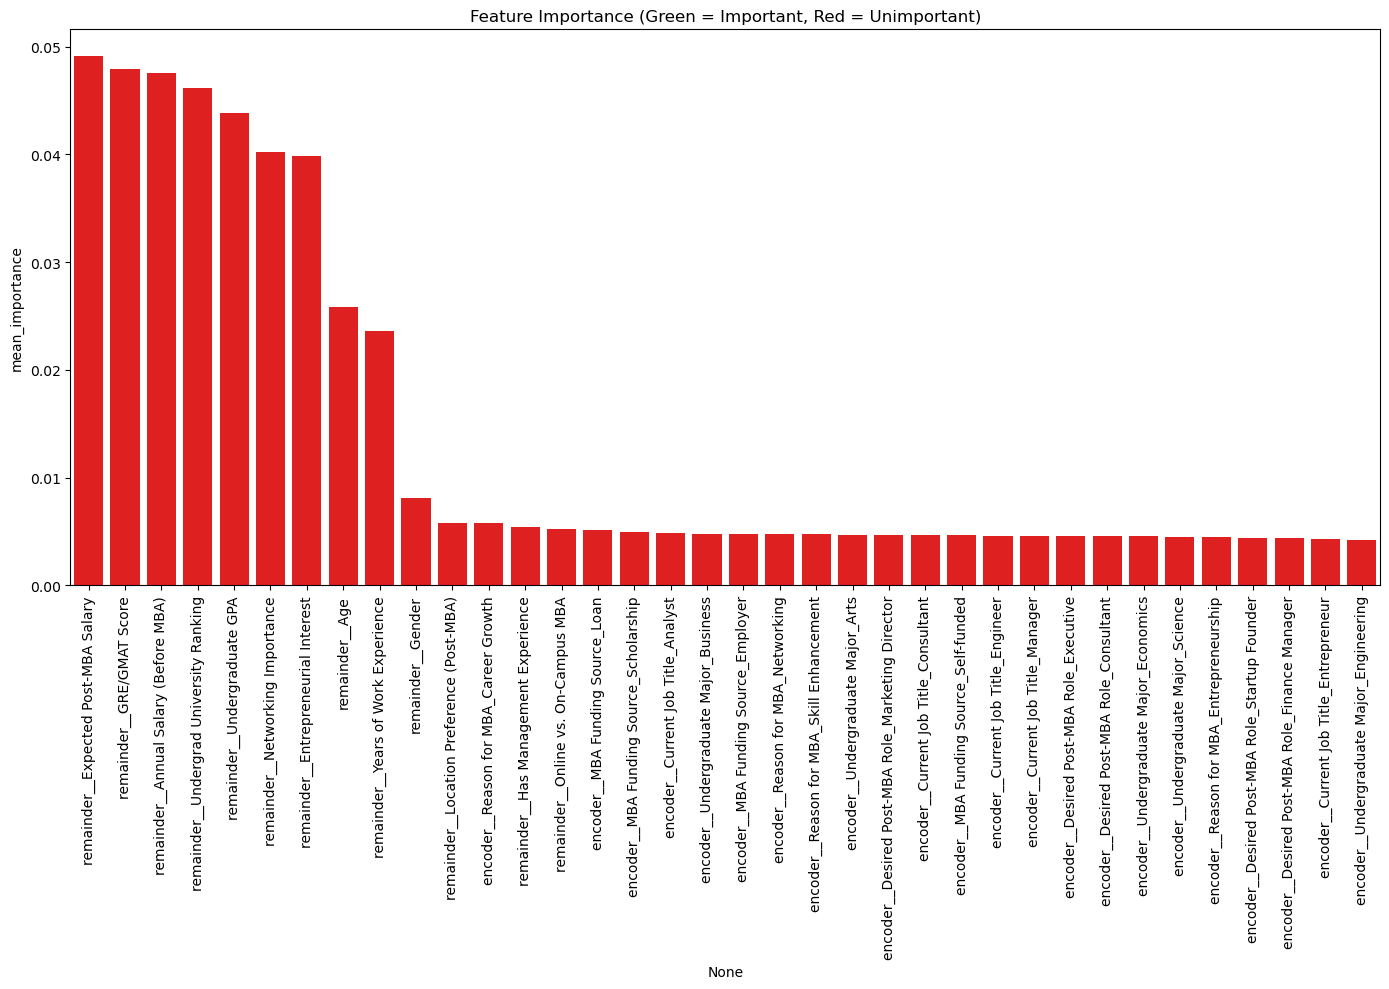


Important features for MBA decision prediction:

Full results saved to 'boruta_results.csv'


In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Function to implement Boruta feature selection
def boruta_feature_selection(X, y, n_iterations=200, alpha=0.1):
    """
    Boruta feature selection implementation.
    
    Parameters:
    -----------
    X : pandas DataFrame
        Features dataframe
    y : pandas Series
        Target variable
    n_iterations : int, default=200
        Number of iterations to perform
    alpha : float, default=0.1
        Significance level
        
    Returns:
    --------
    pandas DataFrame with feature importance and selection status
    """
    # Create a copy of the features dataframe
    X_boruta = X.copy()
    
    # Add shadow features (shuffled copies of all features)
    for feature in X.columns:
        X_boruta[f"shadow_{feature}"] = np.random.permutation(X[feature].values)
    
    # Initialize feature importance history
    feature_history = {}
    for feature in X_boruta.columns:
        feature_history[feature] = []
    
    # Fit random forest and compute feature importance for n_iterations
    for i in range(n_iterations):
        # Initialize and fit Random Forest
        rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=i)
        rf.fit(X_boruta, y)
        
        # Record feature importance
        for feature, importance in zip(X_boruta.columns, rf.feature_importances_):
            feature_history[feature].append(importance)
    
    # Calculate mean and standard deviation of feature importance
    feature_stats = pd.DataFrame({
        'mean_importance': {feature: np.mean(importances) for feature, importances in feature_history.items()},
        'std_importance': {feature: np.std(importances) for feature, importances in feature_history.items()}
    })
    
    # Identify real and shadow features
    feature_stats['is_shadow'] = feature_stats.index.str.startswith('shadow_')
    
    # Find max shadow feature importance
    shadow_importances = feature_stats[feature_stats['is_shadow']]['mean_importance']
    max_shadow_importance = shadow_importances.max()
    
    # Determine significance using a t-test compared to shadow features
    real_features = feature_stats[~feature_stats['is_shadow']].copy()  # Use .copy() to avoid SettingWithCopyWarning
    shadow_features = feature_stats[feature_stats['is_shadow']]
    
    # Get mean and std of shadow features
    shadow_mean = shadow_features['mean_importance'].mean()
    shadow_std = shadow_features['mean_importance'].std()
    
    # Calculate z-scores for real features
    real_features.loc[:, 'z_score'] = (real_features['mean_importance'] - shadow_mean) / shadow_std
    
    # Calculate p-values from z-scores
    real_features.loc[:, 'p_value'] = [1 - stats.norm.cdf(z) for z in real_features['z_score']]
    
    # Determine which features are significant
    real_features.loc[:, 'is_significant'] = real_features['p_value'] < alpha
    
    # Determine which features are better than the max shadow feature
    real_features.loc[:, 'better_than_shadow'] = real_features['mean_importance'] > max_shadow_importance
    
    # Final decision on feature importance
    real_features.loc[:, 'decision'] = np.where(
        real_features['is_significant'] & real_features['better_than_shadow'],
        'Important',
        'Unimportant'
    )
    
    return real_features

# Function to run Boruta on the MBA data
def run_boruta_on_mba_data(data, plot_results=True):
    """
    Run Boruta feature selection on the MBA dataset
    
    Parameters:
    -----------
    data : pandas DataFrame
        The MBA dataset (data_v1)
    plot_results : bool, default=True
        Whether to plot the feature importance
        
    Returns:
    --------
    DataFrame with feature importance results
    """
    # Separate features and target
    X = data.drop('remainder__Decided to Pursue MBA?', axis=1)
    y = data['remainder__Decided to Pursue MBA?']
    
    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = [col for col in X.columns if col.startswith('remainder__')]
    X_scaled = X.copy()
    X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    # Run Boruta
    results = boruta_feature_selection(X_scaled, y)
    
    # Sort by mean importance
    results = results.sort_values('mean_importance', ascending=False)
    
    # Plot if requested
    if plot_results:
        plt.figure(figsize=(14, 10))
        
        # Plot feature importance with color coding
        colors = ['green' if x == 'Important' else 'red' for x in results['decision']]
        
        # Only plot the actual features, not the shadow features
        sns.barplot(x=results.index, y='mean_importance', hue=results.index, palette=colors, legend=False, data=results)
        plt.xticks(rotation=90)
        plt.title('Feature Importance (Green = Important, Red = Unimportant)')
        plt.tight_layout()
        plt.savefig('boruta_feature_importance.png')  # Save the figure
        plt.show()
    
    return results

# Run Boruta on your dataset
# This code assumes data_v1 is already defined and contains all necessary columns
def main():
    # Run Boruta feature selection
    results = run_boruta_on_mba_data(data_v1)
    
    # Print important features
    important_features = results[results['decision'] == 'Important'].index.tolist()
    print("\nImportant features for MBA decision prediction:")
    for feature in important_features:
        print(f"- {feature}")
    
    # Save results to CSV
    results.to_csv('boruta_results.csv')
    print("\nFull results saved to 'boruta_results.csv'")

# Execute the main function if the script is run directly
if __name__ == "__main__":
    # Check if data_v1 exists
    try:
        # Print dataset info
        print("Dataset information:")
        print(f"Shape: {data_v1.shape}")
        print(f"Columns: {len(data_v1.columns)} features plus target variable")
        print(f"Target distribution: {data_v1['remainder__Decided to Pursue MBA?'].value_counts(normalize=True)}")
        
        # Run the main function
        main()
    except NameError:
        print("Error: The dataset 'data_v1' is not defined.")
        print("Please make sure to load your dataset before running this script:")
        print("Example:")
        print("import pandas as pd")
        print("data_v1 = pd.read_csv('your_mba_dataset.csv')")